# 第二节：数据探索

In [1]:
%%html
<style>
.dataframe td,.dataframe tr,.dataframe thead th { 
    note:'pandas表格属性';
    white-space: auto;
    text-align:left;
    border:1px solid;
    font-size:12px
}
.input_prompt{
    note:'隐藏cell左边的提示如 In[12]以便于截图';
#     display:none;
}
div.output_text {
    note:'输出内容的高度';
    max-height: 500px;
}
div.output_area img{
    note:'输出图片的宽度';
    max-width:100%
}
div.output_scroll{
    note:'禁用输出的阴影';
    box-shadow: none;
}
</style>
<h5>!!以上是作者为了排版而修改的排版效果，请注意是否需要使用!!</h5>

## 2.1 训练集数据探索

### 2.1.1 数据特征类型

In [4]:
# 导入相关应用包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# 读取数据
path  = 'D:\Documents\天池竞赛\阿里云安全恶意程序检测\dataset\\'
train = pd.read_csv(path + 'security_train.csv') # 训练集
test  = pd.read_csv(path + 'security_test.csv')  # 测试集

In [5]:
train.head()

,file_id,label,api,tid,index
0,1,5,LdrLoadDll,2488,0
1,1,5,LdrGetProcedureAddress,2488,1
2,1,5,LdrGetProcedureAddress,2488,2
3,1,5,LdrGetProcedureAddress,2488,3
4,1,5,LdrGetProcedureAddress,2488,4


In [6]:
train.describe()

,file_id,label,tid,index
count,8.980669e+07,8.980669e+07,8.980669e+07,8.980669e+07
mean,7.078770e+03,3.862835e+00,2.533028e+03,1.547521e+03
std,3.998794e+03,2.393783e+00,6.995798e+02,1.412249e+03
min,1.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00
25%,3.637000e+03,2.000000e+00,2.356000e+03,3.490000e+02
50%,7.161000e+03,5.000000e+00,2.564000e+03,1.085000e+03
75%,1.055100e+04,5.000000e+00,2.776000e+03,2.503000e+03
max,1.388700e+04,7.000000e+00,2.089600e+04,5.000000e+03


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89806693 entries, 0 to 89806692
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   file_id  int64 
 1   label    int64 
 2   api      object
 3   tid      int64 
 4   index    int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ GB


### 2.1.2 数据分布探索

箱型图（Boxplot），又称为盒须图或盒式图，是一种用于展示数据分布特征的统计图表。

1. **中位数（Median）**：箱子内部的一条线，表示数据的中位数，即数据排序后位于中间位置的数值。

2. **四分位数（Quartiles）**：
   - **第一四分位数（Q1）**：箱子的底部边缘，表示数据中25%的数值低于这个值。
   - **第三四分位数（Q3）**：箱子的顶部边缘，表示数据中75%的数值低于这个值。

3. **四分位距（Interquartile Range, IQR）**：Q3与Q1之间的距离，表示数据中间50%的范围。

4. **须（Whiskers）**：从箱子延伸出去的线，通常表示数据的最小值和最大值，但不包括异常值。须的长度通常是1.5倍的IQR。

5. **异常值（Outliers）**：在须之外的点，表示与其他数据点相比，这些值显著地高或低。在你的图中，这些点位于箱子的两侧。

6. **数据分布的偏斜性**：如果箱子偏向一侧，可能表明数据分布是偏斜的。

7. **数据的集中趋势**：箱子的高度可以给你一个关于数据集中趋势的直观感受。

8. **数据的范围**：须的末端提供了数据的最小值和最大值的信息。

从你的箱型图中可以看出，大多数数据点集中在2500附近，有一些异常值分布在2200到2300之间以及2700到2800之间。中位数位于箱子的中间，表明数据分布相对对称。


<AxesSubplot:xlabel='tid'>

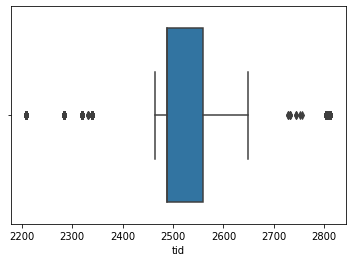

In [8]:
sns.boxplot(x=train.iloc[:10000]["tid"])

In [9]:
train.nunique()

file_id    13887
label          8
api          295
tid         2782
index       5001
dtype: int64

### 2.1.3 数据缺失值探索

In [10]:
train.isnull().sum()

file_id    0
label      0
api        0
tid        0
index      0
dtype: int64

### 2.1.4 奇异值探索

In [13]:
train['index'].describe()

count    35951.000000
mean      2153.216267
std       1537.349809
min          0.000000
25%        722.000000
50%       2004.000000
75%       3502.000000
max       5000.000000
Name: index, dtype: float64

In [14]:
train['tid'].describe()

count    35952.000000
mean      2494.964564
std        129.979938
min        282.000000
25%       2456.000000
50%       2500.000000
75%       2596.000000
max       2980.000000
Name: tid, dtype: float64

### 2.1.5 标签分布探索

In [13]:
train['label'].value_counts()

5    33033543
0    16375107
7    15081535
2     9693969
3     8117585
6     4586578
1     2254561
4      663815
Name: label, dtype: int64

<AxesSubplot:>

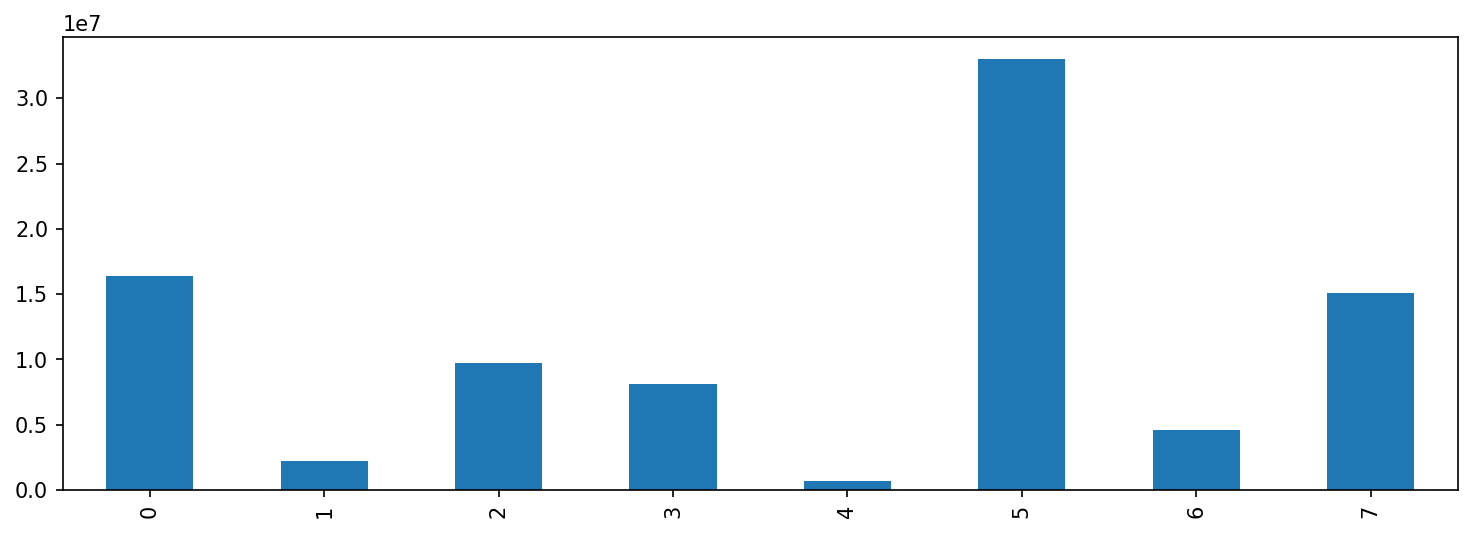

In [14]:
plt.figure(figsize=(12,4),dpi=150)
train['label'].value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot:ylabel='label'>

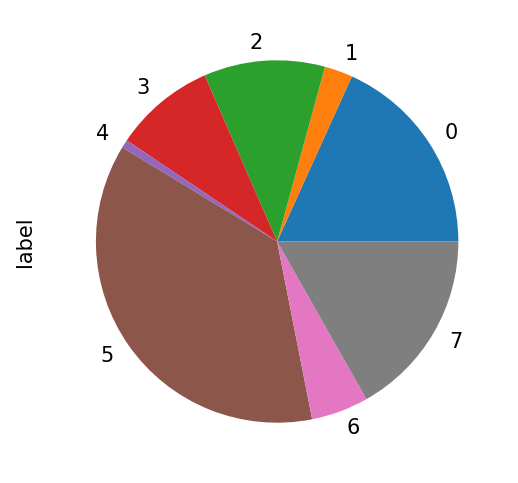

In [15]:
plt.figure(figsize=(4,4),dpi=150)
train['label'].value_counts().sort_index().plot(kind = 'pie')

## 2.2 测试集探索

### 2.2.1 数据信息

In [16]:
test.head()

,file_id,api,tid,index
0,1,RegOpenKeyExA,2332,0
1,1,CopyFileA,2332,1
2,1,OpenSCManagerA,2332,2
3,1,CreateServiceA,2332,3
4,1,RegOpenKeyExA,2468,0


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79288375 entries, 0 to 79288374
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   file_id  int64 
 1   api      object
 2   tid      int64 
 3   index    int64 
dtypes: int64(3), object(1)
memory usage: 2.4+ GB


### 2.2.2 缺失值探索

In [18]:
test.isnull().sum()

file_id    0
api        0
tid        0
index      0
dtype: int64

### 2.2.3 数据分布探索

In [19]:
test.nunique()

file_id    12955
api          298
tid         2047
index       5001
dtype: int64

### 2.2.4 奇异值探索

In [20]:
test['index'].describe()

count    7.928838e+07
mean     1.584815e+03
std      1.411116e+03
min      0.000000e+00
25%      3.900000e+02
50%      1.131000e+03
75%      2.547000e+03
max      5.000000e+03
Name: index, dtype: float64

In [21]:
test['tid'].describe()

count    7.928838e+07
mean     2.491914e+03
std      5.824600e+02
min      1.000000e+02
25%      2.360000e+03
50%      2.556000e+03
75%      2.752000e+03
max      9.196000e+03
Name: tid, dtype: float64

## 2.3 数据集联合分析

### 2.3.1 file_id分析

In [22]:
train_fileids = train['file_id'].unique()
test_fileids  = test['file_id'].unique()

In [23]:
len(set(train_fileids)-set(test_fileids))   

932

In [24]:
len(set(test_fileids)-set(train_fileids))   

0

### 2.3.2 API分析

In [25]:
train_apis = train['api'].unique()
test_apis  = test['api'].unique()

In [26]:
set(test_apis)-set(train_apis)

{'CreateDirectoryExW',
 'InternetGetConnectedStateExA',
 'MessageBoxTimeoutW',
 'NtCreateUserProcess',
 'NtDeleteFile',
 'TaskDialog'}

In [27]:
set(train_apis) - set(test_apis)

{'EncryptMessage', 'RtlCompressBuffer', 'WSASendTo'}